# 4: Korpusanalyse mit pandas




---
## Package Info

### pandas (Python Data Analysis Library)

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.<br>https://pandas.pydata.org/

- library for data manipulation and analysis in python
- frequently used in data science
- main data structure: numerical tables (**Dataframes**)
- provides similar functionality to R (statistical computing language)
- tools for reading and writing different file formats (csv, xml, json)

---
### matplotlib (Visualization with Python)

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.<br>https://matplotlib.org/

- plotting library in python
- allows visualization of pandas data analysis results


---
### numpy (Scientific Computing with Python)

> The fundamental package for scientific computing with Python<br>
https://numpy.org/

- basic package commonly used with pandas and matplotlib


---
## Loading Packages:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---
# Part I: Introduction

## 1. Data Analysis 

#### = Processing, Summarizing, Cleansing, Transforming and Modelling Data to Gain Information on the Data with Statistical Methods

#### 3 Types of Analysis:
   1. **Descriptive Data Analysis** (quantitative summary statistics)
        - measures of central tendency (mean, median)
        - measures of variability/dispersion (standard deviation, variance, percentile)
   2. **Inferential Data Analysis** (hypothesis testing)
   3. **Exploratory Data Analysis** (e.g. clustering, discovering patterns in data)


#### Different Types of Data:
   - different **statistical data types** (categorical data \[nominal scale\] vs. numerical data \[ordinal, interval, ratio scale\])
   - text vs. non-text data, ...

##### Main Output Format: numeric or tabular data

---
## 2. Data Visualization 

#### = graphical output of data analysis results
- e.g.scatter plots, histograms, box plots, tree maps


- goals:
    - visual exploration of data
    - communicate results of data analysis study

---
## 3. Basic Data Structures in pandas

- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

---

### Series
##### = one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)
- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series
- https://pandas.pydata.org/docs/reference/api/pandas.Series.html



In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

---
### Data Frame

##### = tabular (two-dimensional) data structure
   - each column: contains values of one variable   
   - each row: contains one set of values from each column

- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
 
 
- preferred data structure in data science



In [3]:
#Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:
data_frame = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
data_frame

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


---
# Part II: Example Corpus (CSV-Headline-Dataset)

- Subset of ***ABC News Million Headlines Corpus*** (https://www.kaggle.com/therohk/million-headlines/data):
    - Text + Metadata (publish date)
    - tabular format (csv)

## 1. Read CSV as Data Frame & Basic Stats

In [4]:
#data: https://www.kaggle.com/therohk/million-headlines/data
df = pd.read_csv('abcnews-2020.csv', sep=",", lineterminator='\n')
df.head()

,publish_date,headline_text
0,20200101,a new type of resolution for the new year
1,20200101,adelaide records driest year in more than a de...
2,20200101,adelaide riverbank catches alight after new ye...
3,20200101,adelaides 9pm fireworks spark blaze on riverbank
4,20200101,archaic legislation governing nt women propert...


In [5]:
# number of data records
df.shape

(40240, 2)

In [6]:
# check for duplicates
df.isnull().any().sum()
df.headline_text.duplicated().any()

True

In [7]:
# remove duplicates
df = df.drop_duplicates('headline_text')
df.shape

(39609, 2)

## 3.1 Update and Filter Data Frame (based on date functionality)
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [8]:
df['DateTime'] = pd.to_datetime(df['publish_date'].astype(str), format='%Y%m%d')

In [9]:
df.head()

,publish_date,headline_text,DateTime
0,20200101,a new type of resolution for the new year,2020-01-01
1,20200101,adelaide records driest year in more than a de...,2020-01-01
2,20200101,adelaide riverbank catches alight after new ye...,2020-01-01
3,20200101,adelaides 9pm fireworks spark blaze on riverbank,2020-01-01
4,20200101,archaic legislation governing nt women propert...,2020-01-01


#### Subselection based on time intervall:

In [10]:
import datetime
print(datetime.date(2020,12,1))

2020-12-01


In [11]:
df_2020_12 = df[df['DateTime']>'2020-12-1']
#df_2020_12.head()

In [12]:
df_2020_12.shape

(2996, 3)

## 3.2 Visualize Analysis with matplotlib

In [13]:
#import matplotlib.pyplot as plt
#%matplotlib inline

In [14]:
data = df_2020_12['DateTime'].value_counts().sort_index()
data

2020-12-02    145
2020-12-03    143
2020-12-04    117
2020-12-05     62
2020-12-06     69
2020-12-07    126
2020-12-08    130
2020-12-09    131
2020-12-10    149
2020-12-11    125
2020-12-12     70
2020-12-13     81
2020-12-14    129
2020-12-15    128
2020-12-16    133
2020-12-17    138
2020-12-18    132
2020-12-19     74
2020-12-20     68
2020-12-21    100
2020-12-22    111
2020-12-23    100
2020-12-24     89
2020-12-25     38
2020-12-26     50
2020-12-27     48
2020-12-28     64
2020-12-29     83
2020-12-30     83
2020-12-31     80
Name: DateTime, dtype: int64

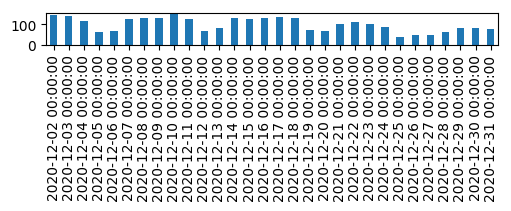

In [15]:
## Create Barplot:
fig = plt.figure(figsize=(5,2), dpi=100)
#data.sort_values().plot(kind = 'bar')
data.plot(kind = 'bar')
#plt.title('')
plt.tight_layout(pad=0.3)
#plt.savefig('plots/type.pdf')
plt.show()

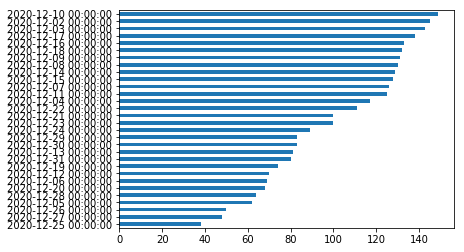

In [16]:
df_2020_12['DateTime'].value_counts().sort_values().plot(kind = 'barh')

## 4. Filter Data Frame (based on text)

- https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

In [17]:
df_2020_12_contains_airport = df_2020_12[df_2020_12['headline_text'].str.contains("airport")]
len(df_2020_12_contains_airport)

12

In [18]:
df_2020_12_contains_airport

,publish_date,headline_text,DateTime
37863,20201207,simon birmingham tells nsw police to tighten a...,2020-12-07
37864,20201207,sydney airport breach which let passengers tra...,2020-12-07
38151,20201210,$9m wentworth airport upgrade set to open,2020-12-10
38292,20201210,video shows groupers swimming in brisbane airp...,2020-12-10
38300,20201210,wildlife at the brisbane airport,2020-12-10
39107,20201217,wa police tell nsw passengers at perth airport,2020-12-17
39401,20201221,confusion at adelaide airport and sa nsw border,2020-12-21
39439,20201221,nsw coronavirus new sydney venues and airport ...,2020-12-21
39820,20201225,south australia travellers reunite with family...,2020-12-25
39964,20201228,melbourne airport link to use elevated track,2020-12-28


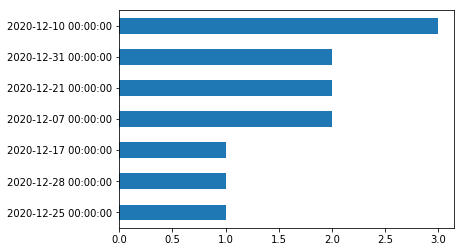

In [19]:
df_2020_12_contains_airport['DateTime'].value_counts().sort_values().plot(kind = 'barh')

In [20]:
series_2020_12_contains_airport = df_2020_12['headline_text'].str.contains("airport")
len(series_2020_12_contains_airport)

2996

In [21]:
series_2020_12_contains_airport

37215    False
37216    False
37217    False
37218    False
37219    False
         ...  
40235    False
40236    False
40237    False
40238    False
40239    False
Name: headline_text, Length: 2996, dtype: bool

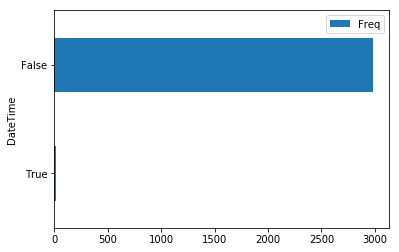

In [22]:
from collections import Counter
df_2020_12_counter_contains_airport = pd.DataFrame(Counter(series_2020_12_contains_airport).most_common(), columns=['DateTime', 'Freq'])
df_2020_12_counter_contains_airport.sort_values('Freq', ascending=True).plot(kind='barh', x='DateTime')

## 5. Text Analysis

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [23]:
#https://www.kaggle.com/chandanarprasad/million-headlines-nlp-exploration
df.headline_text.unique()

array(['a new type of resolution for the new year',
       'adelaide records driest year in more than a decade',
       'adelaide riverbank catches alight after new years eve fireworks',
       ...,
       'what victorias coronavirus restrictions mean for new years eve',
       'whats life like as an american doctor during covid',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [24]:
print("average word count: ", df['headline_text'].str.split().apply(len).mean())

average word count:  7.961170441061375


In [25]:
print("average character count: ", df['headline_text'].str.len().mean())

average character count:  52.541316367492236


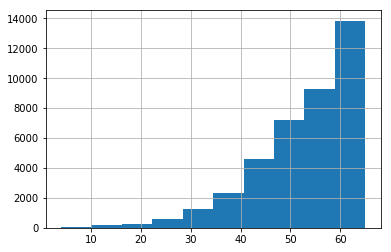

In [26]:
df['headline_text'].str.len().hist()

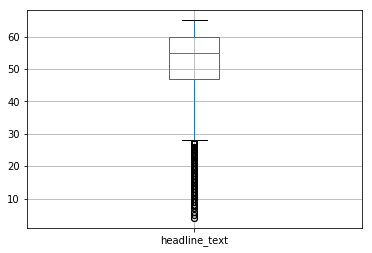

In [27]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
pd.DataFrame(df['headline_text'].str.len()).boxplot()

---
# &Uuml;bungsaufgaben 4



## Aufgabe 1 (Frequenzliste mit pandas)

### Aufgabe 1a
Berechnen Sie für folgende Tokenliste die Frequenzliste mit pandas, indem Sie die Liste in eine pandas-Series umwandeln:

In [28]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

### Aufgabe 1b
Wandeln Sie folgendes Mini-Satzkorpus in ein pandas-Dataframe mit Spalte `texts` um und zählen Sie anschließend die Tokens, indem Sie die String-Methode `str.split()` auf diese Spalte anwenden:

In [29]:
corpus = ['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

## Aufgabe 2 (Textverarbeitung mit pandas)

Lesen Sie den Wahlverwandschaften-Text zeilenweise in ein pandas-Dataframe ein und führen Sie anschließend untenstehende Korpusanalysen aus. 

In [30]:
import pandas as pd
df = pd.read_csv('wahlverwandschaften.txt', sep = "\n", header=None) 
df.columns = ['lines']
df.head()

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel


### Aufgabe 2a 
Tokenisieren Sie den Text und erstellen Sie eine Frequenzliste.

### Aufgabe 2b

Erstellen Sie eine Stopwort-gefilterte Frequenzliste.

### Aufgabe 2c
Berechnen Sie die durchschnittliche Zeilen- und Wortlänge.

## Aufgabe 3 (Bigramme mit pandas und NLTK)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und NLTK ngrams.

In [31]:
from nltk import ngrams

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

## Aufgabe 4 (UD-Korpusanalyse mit pandas)

Lesen Sie das UD-Korpus https://raw.githubusercontent.com/proiel/proiel-treebank/master/latin-nt.conll in ein pandas-Dataframe ein und führen Sie dieselben Korpusanalysen wie in obigen Aufgaben aus. Visualisieren Sie auch die Ergebnisse.